# Demo 3 - crustal hi-res & lo-res viewers

In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

## Pyvista - simple hi-res images 

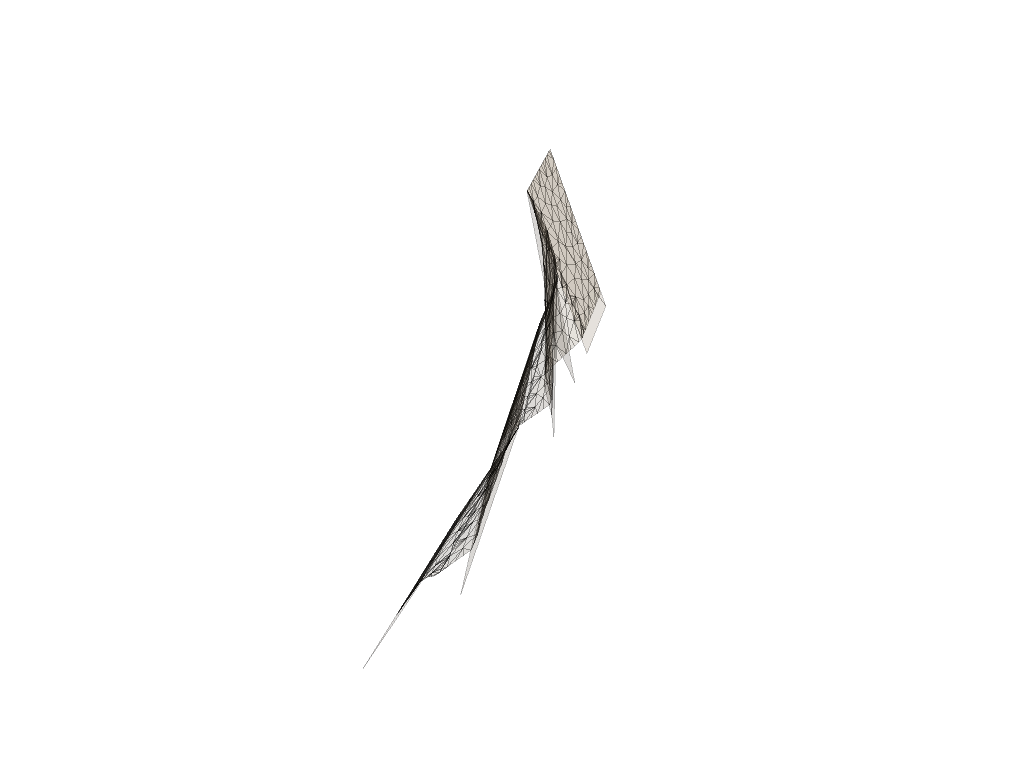

In [2]:
import pyvista as pv

mesh1 = pv.PolyData()
for f in "ABCDE":
    fname = "./tmp/lo-res/Wellington_Hutt_Valley_%s.vtk" % f
    mesh1 += pv.read(fname)

mesh2 = pv.PolyData()
for f in range(1,6):
    fname = "tmp/hi-res/Wellington_Hutt_Valley_%s.vtk" % f
    mesh2 += pv.read(fname)

mesh = mesh1 + mesh2    
    
# camera_pos = [(107000.0, 68.5, 204.0), (128000.0, 86.5, 223.5), (0.45, 0.36, -0.8)]
camera_pos = mesh.plot(opacity=0.2, color=True, show_edges=True)

## ipyvolume - interactive 3D viewer

In [4]:
#extract ipv tri_surf paramaters from pyvista objects
points1 = mesh1.points.transpose()
x1 = points1[0]
y1 = points1[1]
z1 = points1[2]

points2 = mesh2.points.transpose()
x2 = points2[0]
y2 = points2[1]
z2 = points2[2]

def tri_indices(mesh):
    for i in range(0, mesh.n_cells * 4, 4):
        yield mesh.cells[i+1:i+4]

In [5]:
import ipyvolume as ipv
import ipywidgets as widgets

fig = ipv.figure(height=600, width=600)
    
m1 = ipv.plot_trisurf(x=x1, y=y1, z=z1, triangles=[x for x in tri_indices(mesh1)], color='lightgray')
m2 = ipv.plot_trisurf(x=x2, y=y2, z=z2, triangles=[x for x in tri_indices(mesh2)], color='red')

ipv.ylim( min(y1.min(), y2.min()), max(y1.max(), y2.max()))
ipv.xlim( min(x1.min(), x2.min()), max(x1.max(), x2.max()))
ipv.zlim( -40e3, 0) #figure out how to set this so dip is correct!


/home/chrisbc/anaconda3/envs/ipyvolume/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


In [6]:
# Add some user controls
show_lo_res =  widgets.ToggleButton(
    value=True,
    description='Lo Res (Stirling)',
    disabled=False)

show_hi_res =  widgets.ToggleButton(
    value=True,
    description='Hi Res (tsurf)',
    disabled=False)

def on_hires_button_changed(b):
    m2.material.visible = b['new']

def on_lores_button_changed(b):
    m1.material.visible = b['new']

show_lo_res.observe(on_lores_button_changed, names='value')
show_hi_res.observe(on_hires_button_changed, names='value')


In [7]:
ipv.show()

In [8]:
widgets.Box([show_lo_res, show_hi_res])

Box(children=(ToggleButton(value=True, description='Lo Res (Stirling)'), ToggleButton(value=True, description=…